# 8. This question involves the use of simple linear regression on the Auto data set

In [1]:
import pandas as pd
import statsmodels.api as sm
from ISLP.models import summarize
import numpy as np
import matplotlib.pyplot as plt

In [23]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
auto = auto[['horsepower', 'mpg']]
auto.head()

,horsepower,mpg
0,130,18.0
1,165,15.0
2,150,18.0
3,150,16.0
4,140,17.0


In [25]:
# display the rows and columns values of the dataset
auto.shape

(397, 2)

In [26]:
# display how many non values of the dataset and what is the type of each column
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  397 non-null    object 
 1   mpg         397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [27]:
# count number of unique values for each columns
auto.nunique()

horsepower     94
mpg           129
dtype: int64

In [28]:
# convert 'horsepower' to numeric, if errors in some rows than to NaN for that row's value
# error = 'coerce', any value that cannot be converted to a number (such as a string or a character like '?')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [29]:
# drop the rows where nan values
auto.dropna(inplace=True)

In [30]:
auto.shape

(392, 2)

In [31]:
auto.describe()

,horsepower,mpg
count,392.000000,392.000000
mean,104.469388,23.445918
std,38.491160,7.805007
min,46.000000,9.000000
25%,75.000000,17.000000
50%,93.500000,22.750000
75%,126.000000,29.000000
max,230.000000,46.600000


## (a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

1. Is there a relationship between the predictor and the response?
2. How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [32]:
# the intercept represents the value for the response variable, when predictor variable is zero
# so for this, I will make intercept column initialize 1 for all rows
auto['intercept'] = 1

In [33]:
auto.head()

,horsepower,mpg,intercept
0,130.0,18.0,1
1,165.0,15.0,1
2,150.0,18.0,1
3,150.0,16.0,1
4,140.0,17.0,1


In [34]:
X = auto[['intercept','horsepower']]
y = auto['mpg']

In [35]:
model = sm.OLS(y, X)
results = model.fit()

In [36]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### 1. Is there a relationship between the predictor and the response?

t value for the horsepower is -24.489 is large number in absolute term indicating strong relationship between the horsepower and mpg. And p value = 0.0 is evidence that this relationship significant. 

### 2. How strong is the relationship between the predictor and the response?

In [37]:
#R square
results.rsquared

0.6059482578894348

In [38]:
#RSE
np.sqrt(results.scale)

4.90575691954594

R sqaured is 0.6 means, the predictor is explaining 60% of the variance in the response variable. 40% is unexplained. RSE is 4.9, which suggest that the average amount that the y will deviate from true regression line. 

### 3. Is the relationship between the predictor and the response positive or negative?

There is negative relationship between horsepower and mpg, suggesting when horsepower value increase the response varibale 'mpg' decrease.

### 4. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [58]:
# do the prediction upon intercept = 1 and horsepower = 98
new_predictions = results.get_prediction([1,98]);
new_predictions.predicted_mean

array([20.99449302])

In [59]:
# display the confidence interval 
new_predictions.conf_int(alpha=0.05)

array([[20.4690916 , 21.51989444]])

In [41]:
# display the prediction interval 
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

Predicted mpg for horsepower of 98 is 24.46707715

Confidence Interval are [23.97307896, 24.96107534]

Prediction Interval are [14.80939607, 34.12475823]

## (b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.


In [47]:
def abline(ax, intercept, slop):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [slop * xlim[0] + intercept, slop * xlim[1] + intercept]
    ax.plot(xlim, ylim, color='red')

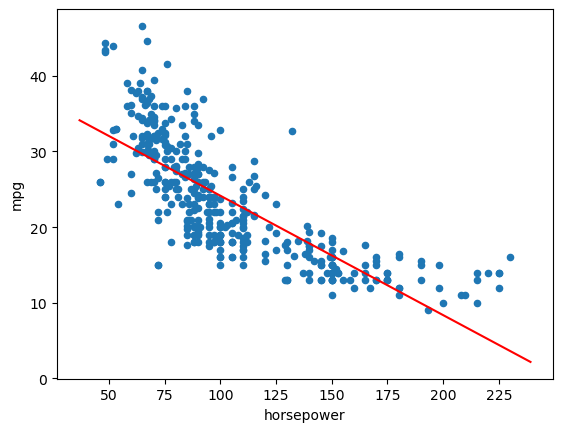

In [48]:
ax = auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params[0], results.params[1])

## (c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

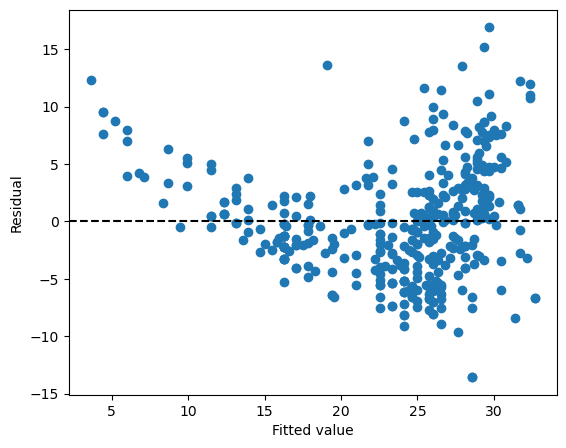

In [49]:
fig, ax = plt.subplots(figsize=(6.3,5))
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value') 
ax.set_ylabel('Residual')

# have color black and dashed line
ax.axhline(0, c='k', ls='--');

There is evidence of non-linearity in the graph. So, we can try non linear approach for this problem to get the best fit which reduce the error between actual and predicted values.

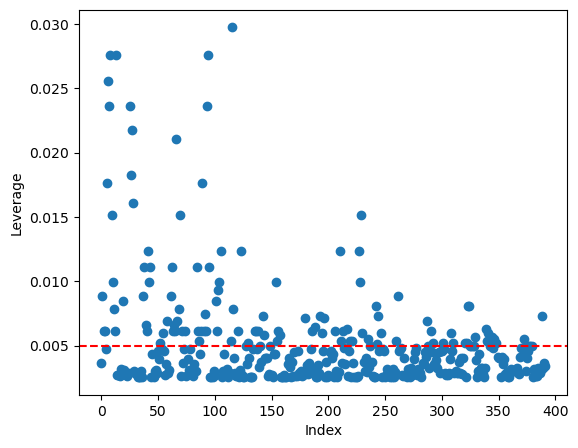

In [57]:
infl = results.get_influence()
ax = plt.subplots(figsize=(6.3,5))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, ) 
ax.set_xlabel('Index')
ax.set_ylabel('Leverage') 
np.argmax(infl.hat_matrix_diag)
ax.axhline(0.005, c='r', ls='--');
plt.show()

Points above the line are have the most potential to affect the regression line.

L.S = (1 + P) / n = 0.005